In [34]:
%matplotlib inline
# Импортируем необходимые библиотеки
import numpy as np  # Для математических операций и работы с массивами
import pandas as pd  # Для работы с табличными данными
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для визуализации данных (более красивые графики)
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge # Модель линейной регрессии
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных
from sklearn.model_selection import train_test_split  # Для разделения на train/test
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.preprocessing import PolynomialFeatures  # Для создания полиномиальных признаков
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error  # Метрики ошибок
from sklearn.metrics import r2_score  # Метрика качества R²
from phik.report import plot_correlation_matrix  # Для визуализации матрицы корреляций
from sklearn.preprocessing import OneHotEncoder  # Для кодирования категориальных переменных
from sklearn.impute import SimpleImputer  # Для заполнения пропущенных значений
from sklearn.pipeline import make_pipeline  # Для создания пайплайнов обработки
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold  # Для кросс-валидации
from sklearn.preprocessing import RobustScaler  # ← теперь RobustScaler

In [35]:
# Загружаем датасет с данными
data = pd.read_csv('financials.csv', sep=',')

In [292]:
# Проверяем, что загрузилась актуальная версия датасета
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Earnings,Sales,Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,9.168655,50.769079,19.655203
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.170029,16.848075,9.486614
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.499778,15.043522,17.639498
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.588872,17.242116,4.149962
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.909305,57.796942,14.172316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.270200,25.764712,13.227872
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.800000,12.084953,0.359770
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...,8.067737,36.503577,48.338912
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,1.019784e+09,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.860124,13.363800,35.711268


In [36]:
# УДАЛЕНИЕ НЕНУЖНЫХ СТОЛБЦОВ ИЗ ДАТАСЕТА
df = data.drop(['Symbol', 'Name', 'SEC Filings', 'Price', 'Price/Earnings', 'Price/Sales', 'Price/Book'], axis=1)

In [37]:
# Дополнительно импортируем библиотеки, необходимые для построения дерева решений и его оценки
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [295]:
# Выводим описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          505 non-null    object 
 1   Dividend Yield  505 non-null    float64
 2   Earnings/Share  505 non-null    float64
 3   52 Week Low     505 non-null    float64
 4   52 Week High    505 non-null    float64
 5   Market Cap      505 non-null    float64
 6   EBITDA          505 non-null    float64
 7   Earnings        505 non-null    float64
 8   Sales           505 non-null    float64
 9   Book            505 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.6+ KB


In [296]:
# АНАЛИЗ ПЕРВЫХ СТРОК ДАННЫХ
df.head()

,Sector,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Earnings,Sales,Book
0,Industrials,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,9.168655,50.769079,19.655203
1,Industrials,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,2.170029,16.848075,9.486614
2,Health Care,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,2.499778,15.043522,17.639498
3,Health Care,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,5.588872,17.242116,4.149962
4,Information Technology,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,5.909305,57.796942,14.172316


In [38]:
# Применяем one-hot encoding к очищенным данным
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # гарантирует, что столбцы будут int
)

# Целевая переменная
y = df_encoded['Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X = df_encoded.drop('Market Cap', axis=1)

In [298]:
X

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,2.332862,7.92,259.77,175.490,9.048000e+09,9.168655,50.769079,19.655203,0,0,0,0,1,0,0,0,0,0
1,1.147959,1.70,68.39,48.925,6.010000e+08,2.170029,16.848075,9.486614,0,0,0,0,1,0,0,0,0,0
2,1.908982,0.26,64.60,42.280,5.744000e+09,2.499778,15.043522,17.639498,0,0,0,1,0,0,0,0,0,0
3,2.499560,3.29,125.86,60.050,1.031000e+10,5.588872,17.242116,4.149962,0,0,0,1,0,0,0,0,0,0
4,1.714470,5.44,162.60,114.820,5.643228e+09,5.909305,57.796942,14.172316,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.170079,1.83,76.81,46.860,7.220000e+08,2.270200,25.764712,13.227872,0,0,0,0,1,0,0,0,0,0
501,1.797080,4.07,86.93,62.850,2.289000e+09,2.800000,12.084953,0.359770,0,0,0,0,0,0,0,0,0,0
502,0.794834,9.01,133.49,108.170,2.007400e+09,8.067737,36.503577,48.338912,0,0,0,1,0,0,0,0,0,0
503,1.480933,2.60,55.61,38.430,1.019784e+09,2.860124,13.363800,35.711268,0,0,1,0,0,0,0,0,0,0


In [299]:
y

0      1.387211e+11
1      1.078342e+10
2      1.021210e+11
3      1.813863e+11
4      9.876586e+10
           ...     
500    1.291502e+10
501    2.700330e+10
502    2.445470e+10
503    1.067068e+10
504    3.599111e+10
Name: Market Cap, Length: 505, dtype: float64

In [39]:
# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split( X, y,  random_state=42, shuffle=True)
print(f"\nРазмеры: Train {len(X_train)}, Test {len(X_test)}")


Размеры: Train 378, Test 127


In [301]:
X_train

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
182,1.352004,2.36,67.540,51.960000,7.216430e+08,2.389549,27.557630,10.875676,0,0,0,0,1,0,0,0,0,0
155,1.966102,4.54,126.650,83.230000,1.507000e+09,4.400828,27.741936,11.704705,1,0,0,0,0,0,0,0,0,0
280,0.262683,3.38,72.170,43.647053,1.405319e+09,3.850814,51.542239,33.585227,0,0,0,0,0,0,0,0,0,0
126,2.049254,-0.65,61.315,42.265000,5.328000e+09,0.730015,25.640313,24.648148,0,1,0,0,0,0,0,0,0,0
448,0.609113,3.16,89.920,50.960000,1.097534e+09,3.140039,25.560943,12.354642,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.80,499.000,263.000000,4.012930e+08,5.800480,104.220158,43.536825,0,0,0,0,0,0,0,0,0,0
270,2.891845,0.01,22.750,16.560000,5.981000e+09,0.670124,5.949143,15.700935,0,1,0,0,0,0,0,0,0,0
348,5.443620,1.66,61.360,47.140000,1.851783e+09,1.600000,20.795453,13.498759,0,1,0,0,0,0,0,0,0,0
435,0.138145,1.14,62.190,45.000000,1.454000e+09,2.509715,52.171324,21.610895,0,0,0,0,1,0,0,0,0,0


In [302]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 182 to 102
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     378 non-null    float64
 1   Earnings/Share                     378 non-null    float64
 2   52 Week Low                        378 non-null    float64
 3   52 Week High                       378 non-null    float64
 4   EBITDA                             378 non-null    float64
 5   Earnings                           378 non-null    float64
 6   Sales                              378 non-null    float64
 7   Book                               378 non-null    float64
 8   Sector_Consumer Staples            378 non-null    int64  
 9   Sector_Energy                      378 non-null    int64  
 10  Sector_Financials                  378 non-null    int64  
 11  Sector_Health Care                 378 non-null    int64  
 1

Поскольку датасет небольшой, чтобы найти абсолютную лучшую комбинацию гиперпараметров для подбора используем метод GridSearchCV. 

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dtr = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': range(2, 30),
    'min_samples_leaf':  range(1, 30)
}
gs = GridSearchCV(dtr,
                  param_grid=param_grid,
                  scoring='r2',
                  n_jobs=-1)

gs.fit(X_train, y_train)
print(f'Лучшие параметры: {gs.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs.best_score_:.3f}')

Лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 21}
Лучшее качество на кросс-валидации: 0.447


Такие же параметры модель выдает при настройках максимальной глубины дерева и минимального числа объектов в листе "по умолчанию".

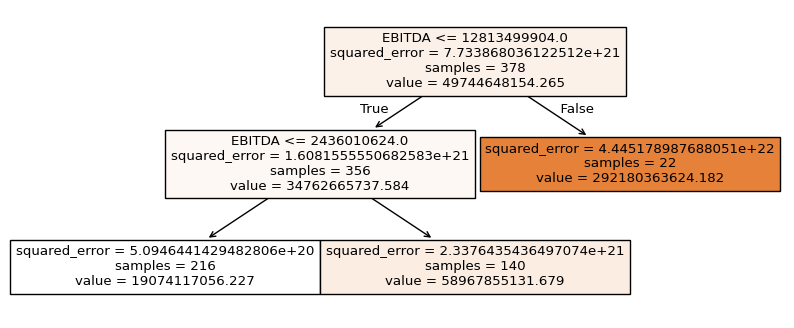

In [41]:
plt.figure(figsize=(10, 4))
tree.plot_tree(
    gs.best_estimator_, # объект обученного дерева
    feature_names=X_train.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

Таким образом, лучшие показатели при построении дерева по мнению модели достигаются при использовании только признака EBITDA.\
То что "лучший" вариант дерева решений имеет глубину 2, вызывает сомнение, поэтому вручную увеличим минимальную глубину дерева, рассчитываемого моделью.

In [42]:
# Сделаем дерево умышленно "ветвистей" и определим какие ещё признаки модель отбирёт при его построении 

dtr = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': range(5, 30),
    'min_samples_leaf':  range(1, 30)
}
gs_1 = GridSearchCV(dtr,
                  param_grid=param_grid,
                  scoring='r2',
                  n_jobs=-1)

gs_1.fit(X_train, y_train)
print(f'Лучшие параметры: {gs_1.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs_1.best_score_:.3f}')

Лучшие параметры: {'max_depth': 6, 'min_samples_leaf': 21}
Лучшее качество на кросс-валидации: 0.431


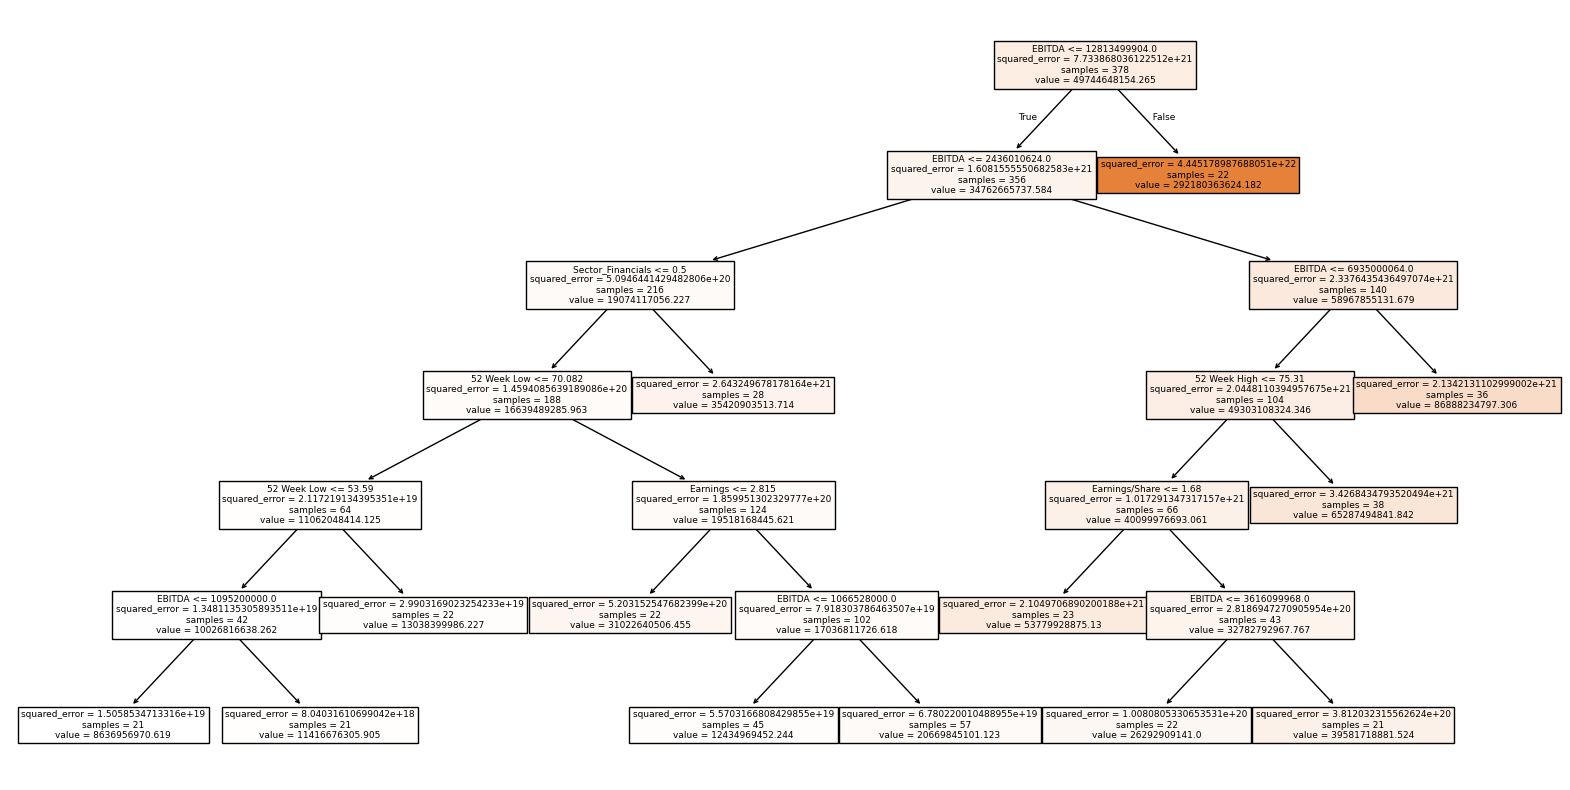

In [43]:
# Построим новое дерево на вручную заданных параметрах
plt.figure(figsize=(20, 10))
tree.plot_tree(
    gs_1.best_estimator_, # объект обученного дерева
    feature_names=X_train.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

In [44]:
# Определим важность признаков
gs_1.best_estimator_.feature_importances_

array([0.        , 0.00416342, 0.00198475, 0.00964145, 0.97656214,
       0.00223077, 0.        , 0.        , 0.        , 0.        ,
       0.00541747, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

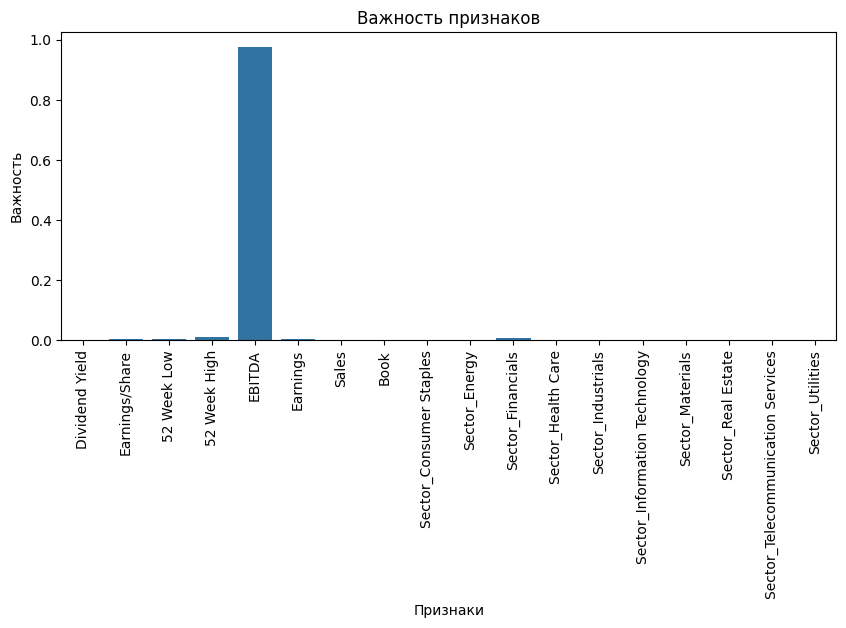

In [45]:
# Построим столбчатую диаграмму коэффициентов важности признаков 
feature = X_train.columns #признаки
feature_importances = gs_1.best_estimator_.feature_importances_ #важность признаков
plt.figure(figsize=(10, 4))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=90)
plt.show()

Таким образом, при глубине дерева не ниже 5, модель использует при построении только Earnings/Share, 52 Week Low, 52 Week High, EBITDA, Earnings и Sector_Financials.\
Удалим неиспользуемые признаки и проверим изменится ли модель на оставшихся.  

In [46]:
# Отбор признаков по важности
selected_features = X_train.columns[feature_importances > 0]

# Создание новых наборов данных с отобранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected

,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sector_Financials
182,2.36,67.540,51.960000,7.216430e+08,2.389549,0
155,4.54,126.650,83.230000,1.507000e+09,4.400828,0
280,3.38,72.170,43.647053,1.405319e+09,3.850814,0
126,-0.65,61.315,42.265000,5.328000e+09,0.730015,0
448,3.16,89.920,50.960000,1.097534e+09,3.140039,0
...,...,...,...,...,...,...
106,0.80,499.000,263.000000,4.012930e+08,5.800480,0
270,0.01,22.750,16.560000,5.981000e+09,0.670124,0
348,1.66,61.360,47.140000,1.851783e+09,1.600000,0
435,1.14,62.190,45.000000,1.454000e+09,2.509715,0


In [47]:
gs_1.fit(X_train_selected, y_train)
print(f'Лучшие параметры: {gs_1.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs_1.best_score_:.3f}')

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 19}
Лучшее качество на кросс-валидации: 0.438


При глубине дерева не меньше 5 максимальная глубина дерева увеличилась до 7, минимальное число объектов в листе уменьшилось до 19, а качество на валидации стало немного лучше.

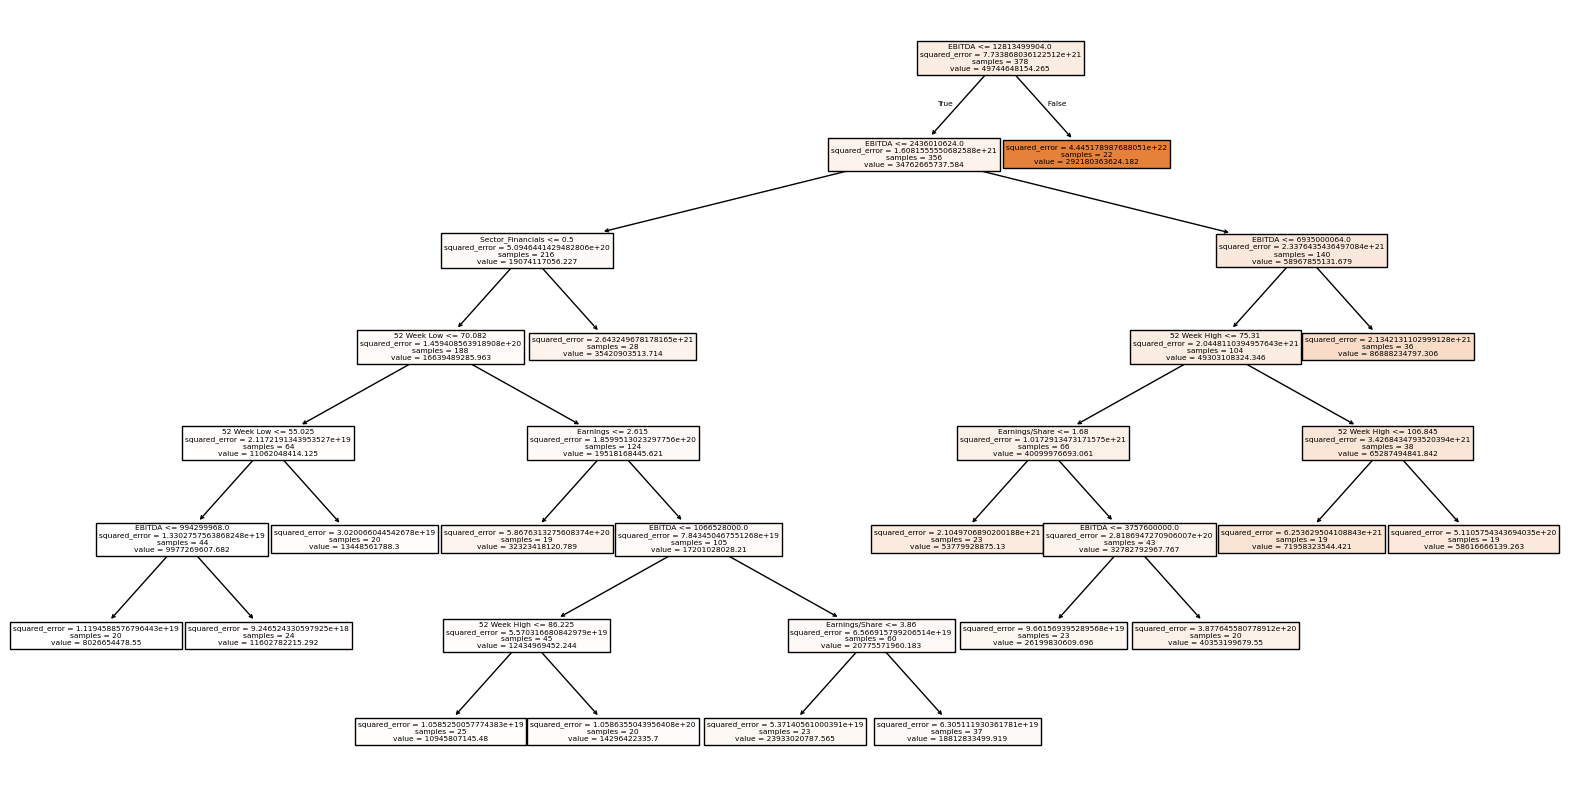

In [48]:
# Построим новое дерево на уменьшенном количестве признаков
plt.figure(figsize=(20, 10))
tree.plot_tree(
    gs_1.best_estimator_, # объект обученного дерева
    feature_names=X_train_selected.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

In [51]:
# Проверим данный вариант на тестовой выборке
y_test_pred = gs_1.predict(X_test_selected)

# Вычислим MSE, RMSE и MAE на тестовой выборке
mse = mean_squared_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)  
mape = mean_absolute_percentage_error(y_test, y_test_pred)  
# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train = gs_1.score(X_train_selected, y_train)
r_sq_test = gs_1.score(X_test_selected, y_test)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MAPE (Mean Absolute Percantage Error): {mape:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test}")

MSE (Mean Squared Error):  3363913973078935207936.00
RMSE (Root Mean Squared Error): 57999258383.87
MAE (Mean Absolute Error): 23613307804.78
MAPE (Mean Absolute Percantage Error): 0.76
Коэффициент детерминации на train r^2: 0.5437331723470749
Коэффициент детерминации на test r^2: 0.6327121867882939


In [52]:
# Сравним эти показатели с данными варианта дерева решений с глубиной 2, который модель представила, как лучший 
y_test_pred_base = gs.predict(X_test)

# Вычислим MSE, RMSE и MAE на тестовой выборке
mse = mean_squared_error(y_test, y_test_pred_base)
rmse = root_mean_squared_error(y_test, y_test_pred_base)
mae = mean_absolute_error(y_test, y_test_pred_base)  
# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train = gs.score(X_train, y_train)
r_sq_test = gs.score(X_test, y_test)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test}")

MSE (Mean Squared Error):  3506734410771630391296.00
RMSE (Root Mean Squared Error): 59217686638.13
MAE (Mean Absolute Error): 25920654879.92
Коэффициент детерминации на train r^2: 0.5158880886268259
Коэффициент детерминации на test r^2: 0.6171183854420375


Таким образом, первоначальная гипотеза о том, что дерево с глубиной 2 - не лучшая модель деревьев, подтвердилась.\
После проведенного отбора признаков и подбора параметров лучшей моделью является дерево решений глубиной 7, с количеством объектов в листе не меньше 19, построенное на признаках Earnings/Share, 52 Week Low, 52 Week High, EBITDA, Earnings и Sector_Financials с целевой переменной Market Cap.  

Для сравнения и возможного улучшения модели прологарифмируем основные финансовые показатели по аналогии с процедурой, проведенной в линейной регрессии:

**'Market Cap'**, **'EBITDA'**, **'Earnings'**, **'Sales'**, **'Book'**

In [53]:
# Логарифмирование ВСЕХ финансовых показателей для одинакового масштаба
financial_metrics = ['Market Cap', 'EBITDA', 'Earnings', 'Sales'] 

for metric in financial_metrics:
    if metric in df_encoded.columns:
        
        # Перед логарифмированием посчитаем количество отрицательных, положительных и 0 значчений
        original_values = df_encoded[metric]
        negative_count = (original_values < 0).sum()
        zero_count = (original_values == 0).sum()
        positive_count = (original_values > 0).sum()

        # Для всех финансовых показателей используем signed log transform
        df_encoded[f'Log_{metric}'] = np.log(np.abs(original_values) + 1) * np.sign(original_values)
        
        # Проверяем результат
        log_values = df_encoded[f'Log_{metric}']
        nan_count = log_values.isna().sum()
        inf_count = np.isinf(log_values).sum()
        
        #  примеры для отрицательных значений (если есть)
        if negative_count > 0:
            negative_examples = df_encoded[original_values < 0].head(2)
            print(f"  Примеры отрицательных значений:")
            for idx, row in negative_examples.iterrows():
                company_name = df_encoded.loc[idx, 'Name'] if 'Name' in df_encoded.columns else f"Index {idx}"
                original_val = row[metric]
                log_val = row[f'Log_{metric}']
                print(f"    {company_name}: {metric} = {original_val:,.2f} → Log_{metric} = {log_val:.4f}")

print(f"\n=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===")
# Проверяем все созданные логарифмированные колонки
log_columns = [f'Log_{metric}' for metric in financial_metrics if f'Log_{metric}' in df_encoded.columns]

for log_col in log_columns:
    values = df_encoded[log_col]
    nan_count = values.isna().sum()
    inf_count = np.isinf(values).sum()
    
    if nan_count == 0 and inf_count == 0:
        print(f" {log_col}: OK (min={values.min():.4f}, max={values.max():.4f})")
    else:
        print(f"{log_col}: {nan_count} NaN, {inf_count} inf")

  Примеры отрицательных значений:
    Index 23: EBITDA = -2,888,100,000.00 → Log_EBITDA = -21.7839
    Index 59: EBITDA = -378,100,000.00 → Log_EBITDA = -19.7507
  Примеры отрицательных значений:
    Index 43: Earnings = -2.64 → Log_Earnings = -1.2919
    Index 49: Earnings = -0.15 → Log_Earnings = -0.1398

=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===
 Log_Market Cap: OK (min=21.6888, max=27.4197)
 Log_EBITDA: OK (min=-22.3460, max=25.1101)
 Log_Earnings: OK (min=-2.3786, max=4.3234)
 Log_Sales: OK (min=0.8204, max=6.8893)


In [54]:
# Убираем исходные значения признаков,
#  оставляем только новые прологорифмированные столбцы с названием log_<имя признака>
df_log = df_encoded.drop(['Market Cap', 'EBITDA', 'Earnings', 'Sales'], axis=1)

In [316]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   Book                               505 non-null    float64
 5   Sector_Consumer Staples            505 non-null    int64  
 6   Sector_Energy                      505 non-null    int64  
 7   Sector_Financials                  505 non-null    int64  
 8   Sector_Health Care                 505 non-null    int64  
 9   Sector_Industrials                 505 non-null    int64  
 10  Sector_Information Technology      505 non-null    int64  
 11  Sector_Materials                   505 non-null    int64  

In [317]:
df_log.head()

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities,Log_Market Cap,Log_EBITDA,Log_Earnings,Log_Sales
0,2.332862,7.92,259.77,175.490,19.655203,0,0,0,0,1,0,0,0,0,0,25.655731,22.925810,2.319310,3.946793
1,1.147959,1.70,68.39,48.925,9.486614,0,0,0,0,1,0,0,0,0,0,23.101276,20.214105,1.153741,2.881896
2,1.908982,0.26,64.60,42.280,17.639498,0,0,0,1,0,0,0,0,0,0,25.349425,22.471422,1.252700,2.775305
3,2.499560,3.29,125.86,60.050,4.149962,0,0,0,1,0,0,0,0,0,0,25.923895,23.056380,1.885382,2.903733
4,1.714470,5.44,162.60,114.820,14.172316,0,0,0,0,0,1,0,0,0,0,25.316018,22.453722,1.932869,4.074090


In [55]:
# Целевая переменная
y_log = df_log['Log_Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X_log = df_log.drop('Log_Market Cap', axis=1)

# Разделяем на трэйн / тест в дефолтном соотношении 75 / 25
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=42)

In [56]:
# Чтобы найти абсолютную лучшую комбинацию гиперпараметров для подбора используем метод GridSearchCV.
dtr_log = DecisionTreeRegressor(random_state=42)

param_grid_log = {
    'max_depth': range(2, 30),
    'min_samples_leaf':  range(1, 30)
}
gs_log = GridSearchCV(dtr_log,
                  param_grid=param_grid_log,
                  scoring='r2',
                  n_jobs=-1)

gs_log.fit(X_train_log, y_train_log)
print(f'Лучшие параметры: {gs_log.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs_log.best_score_:.3f}')

Лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 12}
Лучшее качество на кросс-валидации: 0.584


Качество решающего дерева на всех параметрах, часть из которых прологорифмирована, выросло (0.584 против 0.447). 

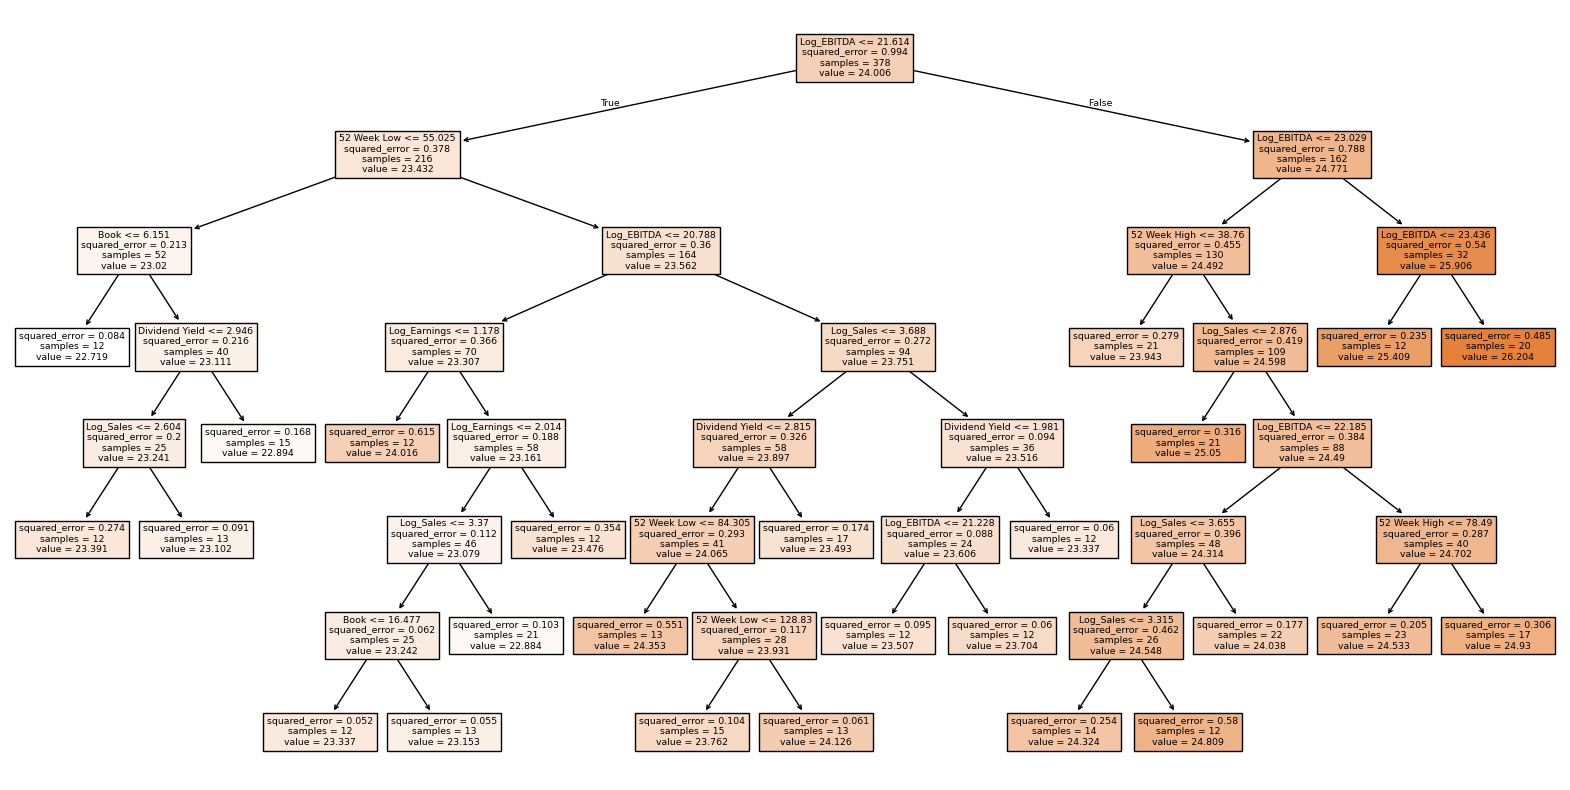

In [57]:
# Изобразим полученное дерево
plt.figure(figsize=(20, 10))
tree.plot_tree(
    gs_log.best_estimator_, # объект обученного дерева
    feature_names=X_train_log.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

In [58]:
# Рассчитаем показатели для модели со всеми признаками, включая прологарифмированные
y_test_pred_log_base = gs_log.predict(X_test_log)

# Вычислим MSE, RMSE и MAE на тестовой выборке
mse_log_base = mean_squared_error(y_test_log, y_test_pred_log_base)
rmse_log_base = root_mean_squared_error(y_test_log, y_test_pred_log_base)
mae_log_base = mean_absolute_error(y_test_log, y_test_pred_log_base)  
# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train_log_base = gs_log.score(X_train_log, y_train_log)
r_sq_test_log_base = gs_log.score(X_test_log, y_test_log)

print(f"MSE (Mean Squared Error):  {mse_log_base:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_log_base:.2f}")
print(f"MAE (Mean Absolute Error): {mae_log_base:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train_log_base}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test_log_base}")

MSE (Mean Squared Error):  0.44
RMSE (Root Mean Squared Error): 0.66
MAE (Mean Absolute Error): 0.48
Коэффициент детерминации на train r^2: 0.7668755915590082
Коэффициент детерминации на test r^2: 0.5940626352596925


Есть основания полагать, что модель переобучена

In [59]:
# Определим важность признаков
gs_log.best_estimator_.feature_importances_

array([0.01957859, 0.        , 0.04889259, 0.03161451, 0.00565483,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.81122941, 0.03049341, 0.05253667])

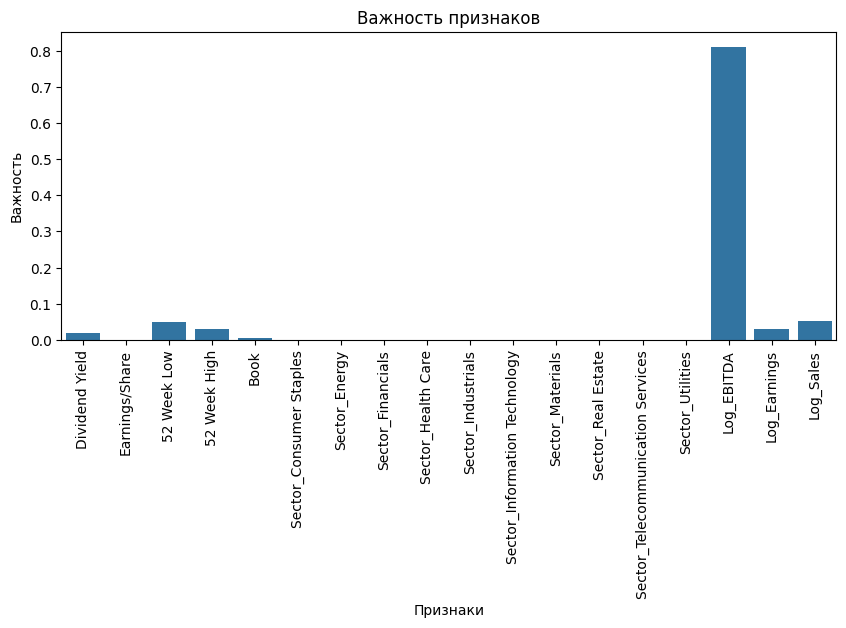

In [60]:
# Построим столбчатую диаграмму коэффициентов важности признаков 
feature = X_train_log.columns #признаки
feature_importances = gs_log.best_estimator_.feature_importances_ #важность признаков
plt.figure(figsize=(10, 4))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=90)
plt.show()

Таким образом, даже после логарифмирования признаков EBITDA, Earnings и Sales, наряду с Dividend Yield, 52 Week Low, 52 Week High и Book сохранили решающее влияние на целевую переменную.\
Удалим неиспользуемые признаки и проверим изменится ли модель на оставшихся.  

In [61]:
# Отбор признаков по важности
selected_features_log = X_train_log.columns[feature_importances > 0]

# Создание новых наборов данных с отобранными признаками
X_train_selected_log = X_train_log[selected_features_log]
X_test_selected_log = X_test_log[selected_features_log]
X_train_selected_log

,Dividend Yield,52 Week Low,52 Week High,Book,Log_EBITDA,Log_Earnings,Log_Sales
182,1.352004,67.540,51.960000,10.875676,20.397041,1.220697,3.351924
155,1.966102,126.650,83.230000,11.704705,21.133387,1.686552,3.358357
280,0.262683,72.170,43.647053,33.585227,21.063530,1.579147,3.961617
126,2.049254,61.315,42.265000,24.648148,22.396242,0.548130,3.282426
448,0.609113,89.920,50.960000,12.354642,20.816332,1.420705,3.279442
...,...,...,...,...,...,...,...
106,0.000000,499.000,263.000000,43.536825,19.810202,1.916993,4.656055
270,2.891845,22.750,16.560000,15.700935,22.511854,0.512898,1.938618
348,5.443620,61.360,47.140000,13.498759,21.339415,0.955511,3.081701
435,0.138145,62.190,45.000000,21.610895,21.097584,1.255535,3.973519


In [62]:
gs_log.fit(X_train_selected_log, y_train_log)
print(f'Лучшие параметры: {gs_log.best_params_}')
print(f'Лучшее качество на кросс-валидации: {gs_log.best_score_:.3f}')

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 11}
Лучшее качество на кросс-валидации: 0.601


Качество модели еще улучшилось (0.601 против 0.584 на всех признаках, включая прологарифмированные), дерево решений стало меньшей глубины (5 против 8 соответственно)

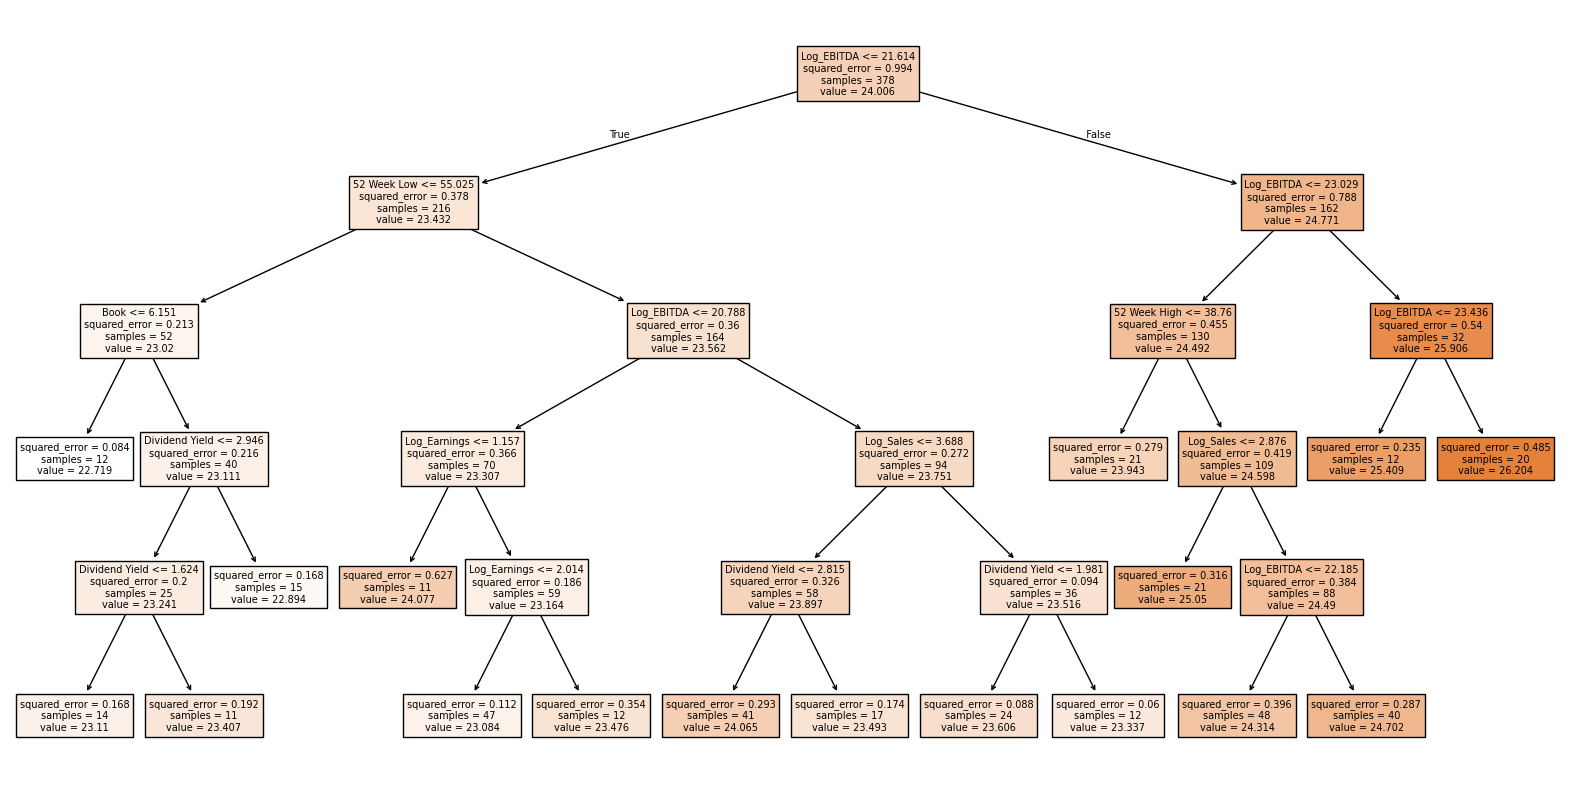

In [63]:
# Построим новое дерево на уменьшенном количестве признаков
plt.figure(figsize=(20, 10))
tree.plot_tree(
    gs_log.best_estimator_, # объект обученного дерева
    feature_names=X_train_selected_log.columns, # наименования факторов
    filled=True, # расцветка графа
)
plt.show()

In [64]:
# Сравним данный вариант на тестовой выборке с лучшим из предыдущих
y_test_pred_log = gs_log.predict(X_test_selected_log)

# Вычислим MSE, RMSE и MAE на тестовой выборке
mse_log = mean_squared_error(y_test_log, y_test_pred_log)
rmse_log = root_mean_squared_error(y_test_log, y_test_pred_log)
mae_log = mean_absolute_error(y_test_log, y_test_pred_log)  
mape_log = mean_absolute_percentage_error(y_test_log, y_test_pred_log)  

# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train_log = gs_log.score(X_train_selected_log, y_train_log)
r_sq_test_log = gs_log.score(X_test_selected_log, y_test_log)

print(f"MSE (Mean Squared Error):  {mse_log:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_log:.2f}")
print(f"MAE (Mean Absolute Error): {mae_log:.2f}")
print(f"MAE (Mean Absolute Percentage Error): {mape_log:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train_log}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test_log}")

MSE (Mean Squared Error):  0.43
RMSE (Root Mean Squared Error): 0.65
MAE (Mean Absolute Error): 0.47
MAE (Mean Absolute Percentage Error): 0.02
Коэффициент детерминации на train r^2: 0.7399277133068729
Коэффициент детерминации на test r^2: 0.606556549248746


Переобучение модели стало меньше, но все же сохраняется, коэффициенты детерминации R2:\
**0,7399** - на trein и **0.6066** - на test после отбора признаков, включая логарифмированные;\
против **0.7669** и **0.5941** соответственно - на всех признаках, включая, часть логарифмированные;\
против **0.5437** и **0.6327** соответственно - на отобранных признаках без логарифмирования.